In [11]:
from pycbc.waveform import get_td_waveform
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [12]:
hp, hc = get_td_waveform(
    approximant="IMRPhenomXPHM",
    mass1=30,           # Solar masses
    mass2=25,           # Solar masses  
    delta_t=1.0/4096,   # Time step
    f_lower=40          # Starting frequency (Hz)
)

In [13]:
print(f"Success! Generated {len(hp)} data points")
print(f"Signal duration: {len(hp) * hp.delta_t:.2f} seconds")

Success! Generated 16384 data points
Signal duration: 4.00 seconds


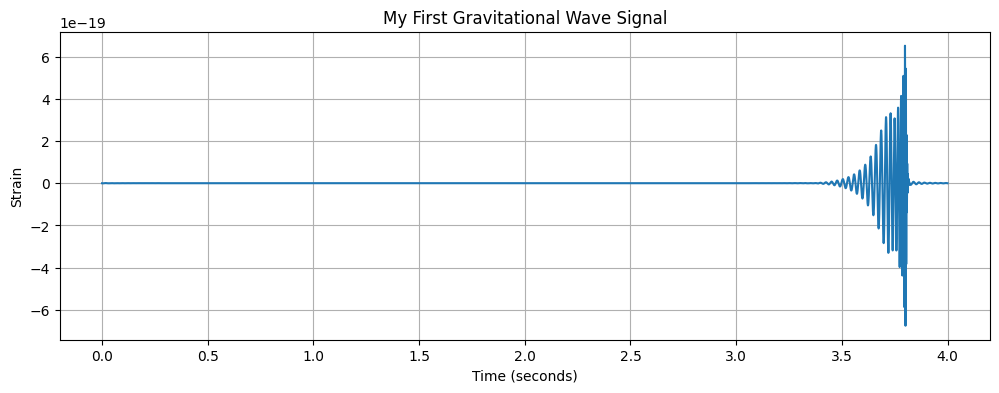

In [14]:
time = [i * hp.delta_t for i in range(0, len(hp))]

plt.figure(figsize=(12, 4))
plt.plot(time, hp)
plt.xlabel('Time (seconds)')
plt.ylabel('Strain')
plt.title('My First Gravitational Wave Signal')
plt.grid(True)
plt.show()

In [15]:
frequencies, times, Sxx = signal.spectrogram(
    hp,
    fs=4096,
    window='hann',
    nperseg=1024,
    noverlap=512    
)

print(f"Frequencies shape: {frequencies.shape}")
print(f"Times shape: {times.shape}")  
print(f"Sxx shape: {Sxx.shape}")

Frequencies shape: (513,)
Times shape: (31,)
Sxx shape: (513, 31)


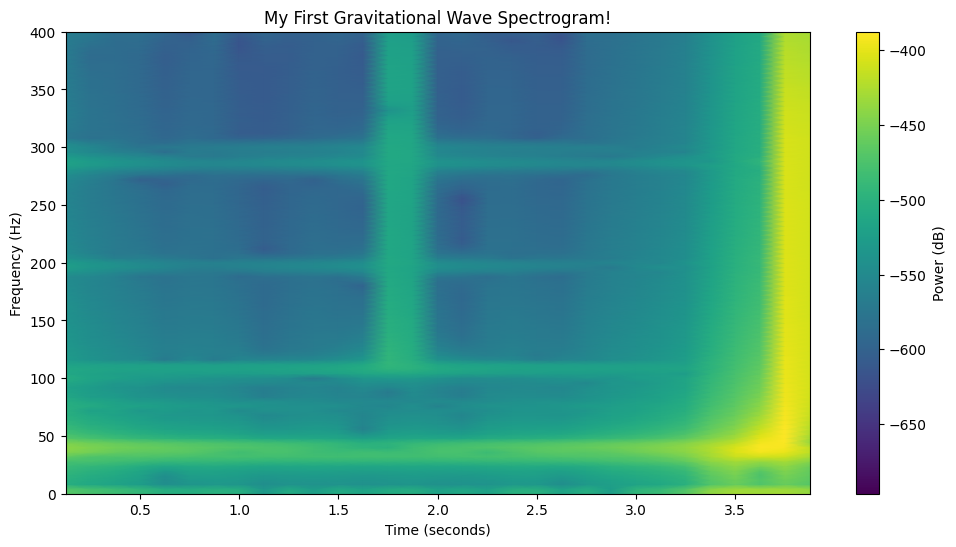

In [16]:
plt.figure(figsize=(12, 6))
plt.pcolormesh(times, frequencies, 10*np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (seconds)')
plt.title('My First Gravitational Wave Spectrogram!')
plt.colorbar(label='Power (dB)')
plt.ylim(0, 400)  # Focus on GW frequency range
plt.show()

In [18]:
#
#
#
#Noise
from pycbc.noise import noise_from_psd
from pycbc.psd import aLIGOZeroDetHighPower

noise = noise_from_psd(
    length = len(hp),
    delta_t = hp.delta_t,
    psd = aLIGOZeroDetHighPower(
        length = len(hp)//2+1,
        delta_f = 1.0/(len(hp)*hp.delta_t),
        low_freq_cutoff = 20
    ),
    seed =42
)

print(f"Generated noise: {len(noise)} samples")
print(f"Noise duration: {len(noise) * noise.delta_t:.2f} seconds")

Generated noise: 16384 samples
Noise duration: 4.00 seconds
